# NAM - Lab Evaluation 1
#### Novel - The Jungle Book by Ruyard Kipling

### Team Members
1. Kshitij Prit Gopali - PES1UG19CS234
2. Mrudhulraj Natarajan - PES1UG19CS281
3. Navya Eedula - PES1UG19CS293
4. Sarthak Deva - PES1UG19CS433

## Theme
### What we know of the story - 

### Protagonists 

In component-1 (Mowgli and Freinds):
1. Mowgli
2. Bagheera
3. Shere Khan (antagonist)

In component-2 (Rikki-Tikki-Tavi):
1. Rikki-Tikki
2. Naag (antagonist)

In component-3 (The White Seal):
1. Kotick (The seal)

In component-4 (The Toomai of Elephants):
1. Toomai

In component-5 (Her Majesty's Servants):
No main protagonist 



In [2]:
from nltk.corpus import gutenberg
import nltk
import pandas as pd
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\navvu\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
# Reading the book from the text file
fp=open('jungle-book.txt','r',encoding='utf-8')
book=fp.read()

# Sample of the text
print(book[0:4998])

﻿     Now Rann the Kite brings home the night
        That Mang the Bat sets free--
     The herds are shut in byre and hut
        For loosed till dawn are we.
     This is the hour of pride and power,
        Talon and tush and claw.
     Oh, hear the call!--Good hunting all
        That keep the Jungle Law!
     Night-Song in the Jungle

It was seven o’clock of a very warm evening in the Seeonee hills when
Father Wolf woke up from his day’s rest, scratched himself, yawned, and
spread out his paws one after the other to get rid of the sleepy feeling
in their tips. Mother Wolf lay with her big gray nose dropped across her
four tumbling, squealing cubs, and the moon shone into the mouth of the
cave where they all lived. “Augrh!” said Father Wolf. “It is time to
hunt again.” He was going to spring down hill when a little shadow with
a bushy tail crossed the threshold and whined: “Good luck go with you, O
Chief of the Wolves. And good luck and strong white teeth go with noble
children th

## Insight and details of the book
The Jungle Book is a 256 page book comprising of 7 short stories - 
1. Mowgli’s Brothers
2. Kaa's Hunting
3. Tiger! Tiger!
4. The White Seal
5. Rikki-Tikki-Tavi
6. Toomai of the Elephants
7. Her Majesty's Servants

The first three stories are related to Mowgli and his friends while the next stories are narratives about other animals in the jungle (each seperate stories that are not interlinked).

## Preprocessing
1. All the characters that have spaces in between them are tokenized.
2. A few characters have mutliple names in the book :   
    a) Raksha -> Mother Wolf  
    b) Rama -> Father Wolf  
    c) Man cub -> Mowgli  
3. Sentence tokenization

In [6]:
book = book.replace('Rikki-Tikki-Tavi', 'Rikki-tikki')
book = book.replace('Gray Brother','Gray_Brother')
book = book.replace('Kala Nag','Kala_Nag')
book = book.replace('Sea Lion','Sea_Lion')
book = book.replace('Mugger Ghaut','Mugger_Ghaut')
book = book.replace('Sea Vitch','Sea_Vitch')
book = book.replace('Shere Khan','Shere_Khan')
book = book.replace('Sea Catch','Sea_Catch')
book = book.replace('Mother Wolf','Mother_Wolf')
book = book.replace('Raksha','Mother_Wolf')
book = book.replace('Father Wolf','Father_Wolf')
book = book.replace('Rama','Father_Wolf')
book = book.replace('Sea Cow','Sea_Cow')
book = book.replace('Big Toomai','Big_toomai')
book = book.replace('Little Toomai','Little_toomai')
book = book.replace('Black Toomai','Black_toomai')
book = book.replace('Little Vixen','Little_vixen')
book = book.replace('Petersen Sahib','Petersen_Sahib')
book = book.replace('man-cub','Mowgli')

In [7]:
# Sentence tokenization
sentences = sent_tokenize(book)
print("The number of sentences in the book :", len(sentences))

The number of sentences in the book : 2500


# Section A - List of all characters in the book

In [8]:
characters=['Akela','Mother_Wolf', 'Darzee','Father_Wolf','Messua','Amir','camel','mule','bullock','horse','eleephant','villagers','Viceroy','Toomai','Black_toomai','Big_toomai', 'Little_toomai','Kotick','Council','Bagheera', 'Baloo', 'Hathi', 'Kaa', 'Mowgli', 'Rikki-tikki', 'Gray_Brother', 'Ikki', 'Mang', 'Mao', 'Kala_Nag', 'Bandar-log', 'Buldeo', 'Gidur-log', 'Grampus', 'Karait', 'Ko', 'Mugger_Ghaut', 'Naag', 'Nagaina', 'Sea_Vitch','Shere_Khan','Tabaqui','Limmershin', 'Rama', 'Sea_Cow','Sea_Catch','Matkah','Sea_Lion','Rann', 'Mang','Petersen_Sahib','Billy','Vixen', 'Little_vixen','Viceroy','Chuchundra']
print("There are",len(characters), "characters in the book")

There are 56 characters in the book


In [9]:
# Converting the character list into dataframe to construct the adjecency matrix
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, Akela to Chuchundra
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Akela           56 non-null     int64
 1   Mother_Wolf     56 non-null     int64
 2   Darzee          56 non-null     int64
 3   Father_Wolf     56 non-null     int64
 4   Messua          56 non-null     int64
 5   Amir            56 non-null     int64
 6   camel           56 non-null     int64
 7   mule            56 non-null     int64
 8   bullock         56 non-null     int64
 9   horse           56 non-null     int64
 10  eleephant       56 non-null     int64
 11  villagers       56 non-null     int64
 12  Viceroy         56 non-null     int64
 13  Toomai          56 non-null     int64
 14  Black_toomai    56 non-null     int64
 15  Big_toomai      56 non-null     int64
 16  Little_toomai   56 non-null     int64
 17  Kotick          56 non-null     int64
 18  Council         56 non-nu

In [10]:
# Empty adjecency matrix
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df

,Akela,Mother_Wolf,Darzee,Father_Wolf,Messua,Amir,camel,mule,bullock,horse,...,Matkah,Sea_Lion,Rann,Mang,Petersen_Sahib,Billy,Vixen,Little_vixen,Viceroy,Chuchundra
Akela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mother_Wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Darzee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Father_Wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Messua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
camel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mule,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bullock,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
horse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Populating the matrix

for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df.loc[char1,char2] += 1
                char_df.loc[char2,char1] += 1

char_df

,Akela,Mother_Wolf,Darzee,Father_Wolf,Messua,Amir,camel,mule,bullock,horse,...,Matkah,Sea_Lion,Rann,Mang,Petersen_Sahib,Billy,Vixen,Little_vixen,Viceroy,Chuchundra
Akela,0,0,0,4,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mother_Wolf,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Darzee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Father_Wolf,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Messua,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amir,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,12,0
camel,0,0,0,0,0,0,0,12,10,10,...,0,0,0,0,0,2,0,0,4,0
mule,0,0,0,0,0,0,12,0,10,16,...,0,0,0,0,0,16,0,0,4,0
bullock,0,0,0,0,0,0,10,10,0,8,...,0,0,0,0,0,4,0,0,8,0
horse,0,0,0,0,0,2,10,16,8,0,...,0,0,0,0,0,14,2,0,8,0


In [12]:
# Dimensions of the matrix:
char_df.shape

(56, 56)

In [13]:
# G = nx.Graph()
# G = nx.from_pandas_adjacency(char_df)

stw = char_df.stack()

# The nodes and edges are present in the graph only for edges that have edge weight equal to or more than 1

stw = stw[stw >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
G = nx.from_pandas_edgelist(stw,  edge_attr=True)
stw

,source,target,weight
0,Akela,Father_Wolf,4
1,Akela,Messua,4
2,Akela,Council,2
3,Akela,Bagheera,6
4,Akela,Baloo,2
...,...,...,...
287,Viceroy,eleephant,8
288,Viceroy,Vixen,4
289,Chuchundra,Darzee,2
290,Chuchundra,Rikki-tikki,4


# Section B - Social Graph

## Nodes and edges in the graph

In [14]:
print("Number of nodes in the graph:", len(G.nodes()))
print("\nThe nodes are:\n", G.nodes())
print("\nNumber of edges in the graph:", len(G.edges()))
print("\nThe edges are:\n", G.edges(data=True))

Number of nodes in the graph: 49

The nodes are:
 ['Akela', 'Father_Wolf', 'Messua', 'Council', 'Bagheera', 'Baloo', 'Mowgli', 'Gray_Brother', 'Buldeo', 'Shere_Khan', 'Mother_Wolf', 'Tabaqui', 'Darzee', 'Rikki-tikki', 'Naag', 'Nagaina', 'Chuchundra', 'villagers', 'Amir', 'horse', 'Viceroy', 'Vixen', 'camel', 'mule', 'bullock', 'eleephant', 'Billy', 'Toomai', 'Black_toomai', 'Big_toomai', 'Little_toomai', 'Kala_Nag', 'Petersen_Sahib', 'Kotick', 'Grampus', 'Ko', 'Sea_Vitch', 'Limmershin', 'Sea_Cow', 'Sea_Catch', 'Matkah', 'Rann', 'Hathi', 'Kaa', 'Ikki', 'Mang', 'Mao', 'Bandar-log', 'Karait']

Number of edges in the graph: 135

The edges are:
 [('Akela', 'Father_Wolf', {'weight': 4}), ('Akela', 'Messua', {'weight': 4}), ('Akela', 'Council', {'weight': 2}), ('Akela', 'Bagheera', {'weight': 6}), ('Akela', 'Baloo', {'weight': 2}), ('Akela', 'Mowgli', {'weight': 24}), ('Akela', 'Gray_Brother', {'weight': 6}), ('Akela', 'Buldeo', {'weight': 8}), ('Akela', 'Shere_Khan', {'weight': 14}), ('Fathe

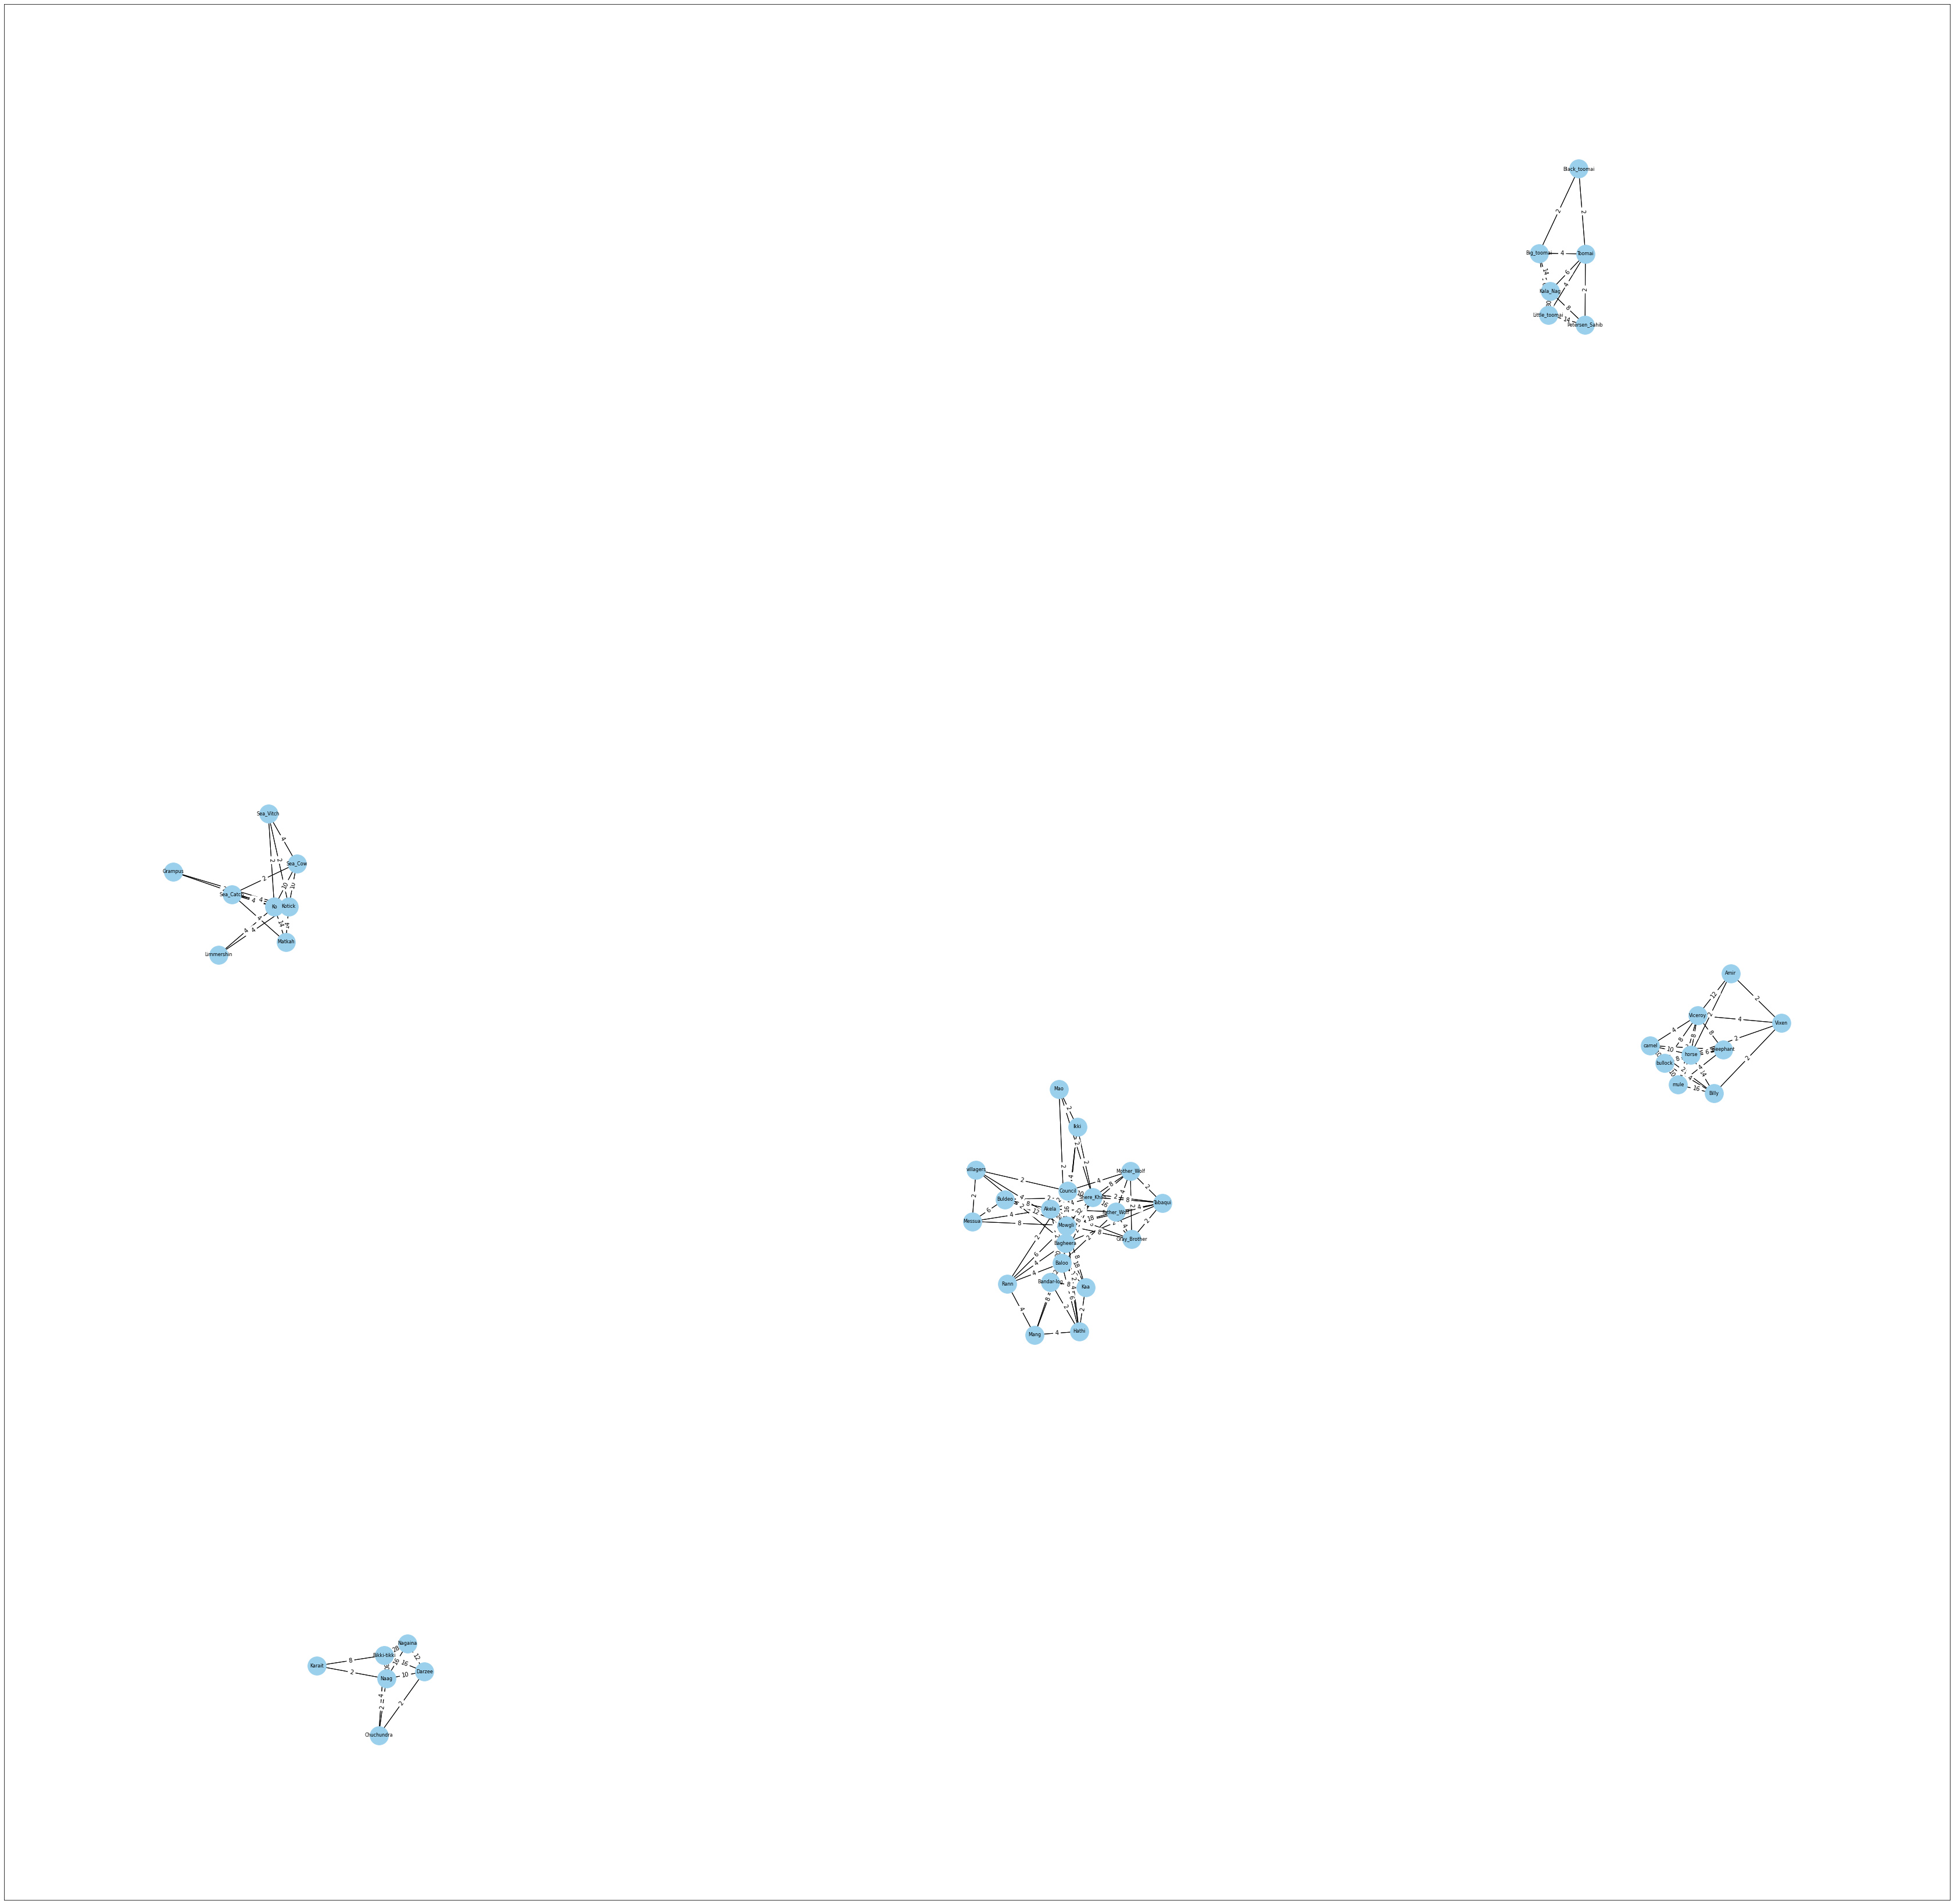

In [15]:
%matplotlib inline
plt.figure(3, figsize=(60,60))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G,pos=pos, node_size = 1000, font_size=8, node_color="#9AD0EC")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

This graph accurately indicates that there are five different stories present in the book, each of whose characters are not interlinked with each other.  
Cluster 1 - Mowgli and Friends   
Cluster 2 - Rikki-Tikki-Tavi  
Cluster 3 - The White Seal (Kotick)  
Cluster 4 - Toomai of the Elephants  
Cluster 5 - Her Majesty's Servants  

In [16]:
largest_cluster = max(nx.connected_components(G), key=len)
largest_cluster

{'Akela',
 'Bagheera',
 'Baloo',
 'Bandar-log',
 'Buldeo',
 'Council',
 'Father_Wolf',
 'Gray_Brother',
 'Hathi',
 'Ikki',
 'Kaa',
 'Mang',
 'Mao',
 'Messua',
 'Mother_Wolf',
 'Mowgli',
 'Rann',
 'Shere_Khan',
 'Tabaqui',
 'villagers'}

The largest cluster consists of nodes from Mowgli's stories

# Section C - The Four Types of Centrality Measure

## Degree Centrality

In [17]:
deg_centrality = nx.degree_centrality(G)
print(sorted(deg_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))

[('Mowgli', 0.35416666666666663), ('Bagheera', 0.29166666666666663), ('Shere_Khan', 0.25), ('Baloo', 0.22916666666666666), ('Council', 0.20833333333333331), ('Akela', 0.1875), ('horse', 0.16666666666666666), ('Father_Wolf', 0.16666666666666666), ('Viceroy', 0.14583333333333331), ('Tabaqui', 0.14583333333333331), ('Kotick', 0.14583333333333331), ('Ko', 0.14583333333333331), ('mule', 0.125), ('camel', 0.125), ('bullock', 0.125), ('Mother_Wolf', 0.125), ('Hathi', 0.125), ('Gray_Brother', 0.125), ('eleephant', 0.10416666666666666), ('Toomai', 0.10416666666666666), ('Rikki-tikki', 0.10416666666666666), ('Rann', 0.10416666666666666), ('Naag', 0.10416666666666666), ('Kaa', 0.10416666666666666), ('Billy', 0.10416666666666666), ('Bandar-log', 0.10416666666666666), ('villagers', 0.08333333333333333), ('Vixen', 0.08333333333333333), ('Sea_Cow', 0.08333333333333333), ('Sea_Catch', 0.08333333333333333), ('Messua', 0.08333333333333333), ('Mang', 0.08333333333333333), ('Little_toomai', 0.083333333333

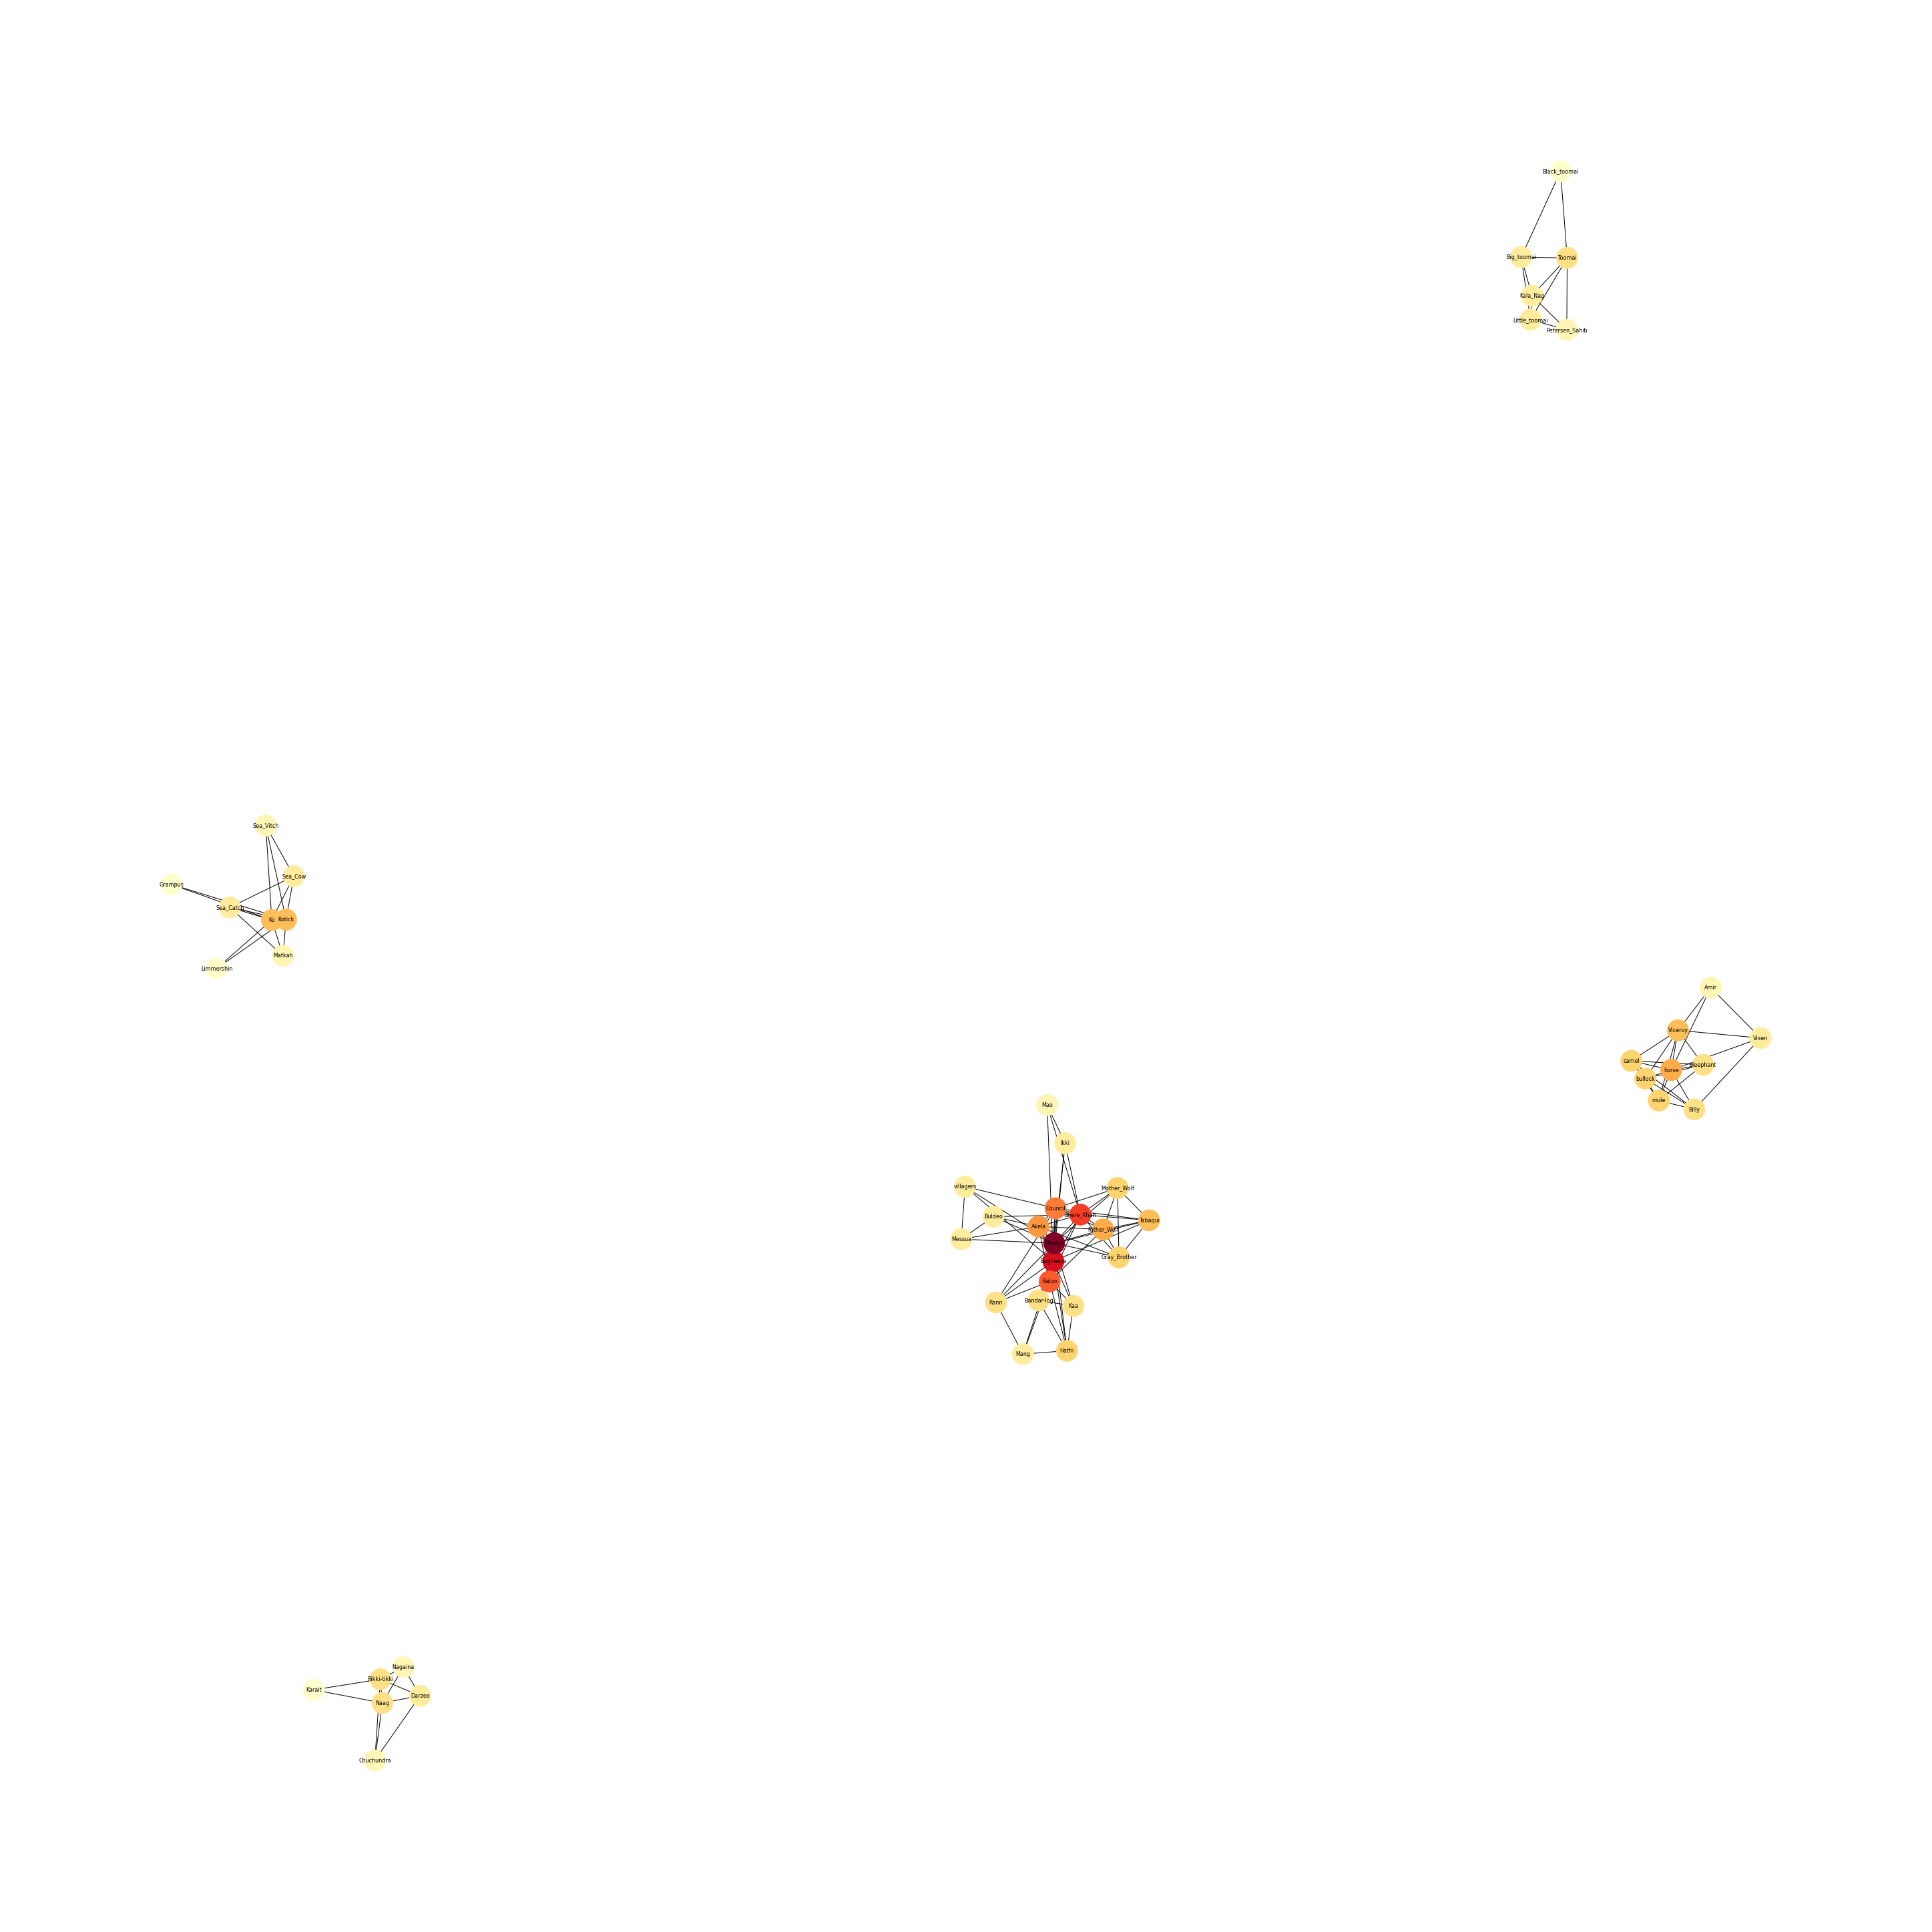

In [18]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(deg_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

The intensity of colours in the graph are indicatives of the measure of degree centrality - Darker the colour, the higher is the degree centrality


### Analysis-
It is seen that Mowgli has the highest degree centrality as it is observed in the story that he interacts with all the characters - both humans and animals and hence has connections with many nodes

Bagheera has the second highest degree centrality as he is seen in the story as a diplomat and mediator who interacts with majority of the animals in the story incluing Baloo, Council of Animals, Mother Wolf, Kaa, Shere Khan, etc.


## Closeness Measure

In [19]:
close_centrality = nx.closeness_centrality(G)
print(sorted(close_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))


[('Mowgli', 0.35813492063492064), ('Bagheera', 0.3133680555555555), ('Shere_Khan', 0.2892628205128205), ('Baloo', 0.2785493827160494), ('Council', 0.26860119047619047), ('Akela', 0.2593390804597701), ('Father_Wolf', 0.25069444444444444), ('Tabaqui', 0.24260752688172044), ('Hathi', 0.23502604166666666), ('Rann', 0.22790404040404041), ('Mother_Wolf', 0.22790404040404041), ('Kaa', 0.22790404040404041), ('Gray_Brother', 0.22790404040404041), ('Bandar-log', 0.22790404040404041), ('villagers', 0.22120098039215685), ('Ikki', 0.22120098039215685), ('Buldeo', 0.21488095238095237), ('Messua', 0.20891203703703703), ('Mao', 0.20891203703703703), ('Mang', 0.19791666666666666), ('horse', 0.16666666666666666), ('Viceroy', 0.14814814814814814), ('Kotick', 0.14583333333333334), ('Ko', 0.14583333333333334), ('mule', 0.13333333333333333), ('camel', 0.13333333333333333), ('bullock', 0.13333333333333333), ('eleephant', 0.12121212121212122), ('Billy', 0.12121212121212122), ('Vixen', 0.1111111111111111), ('T

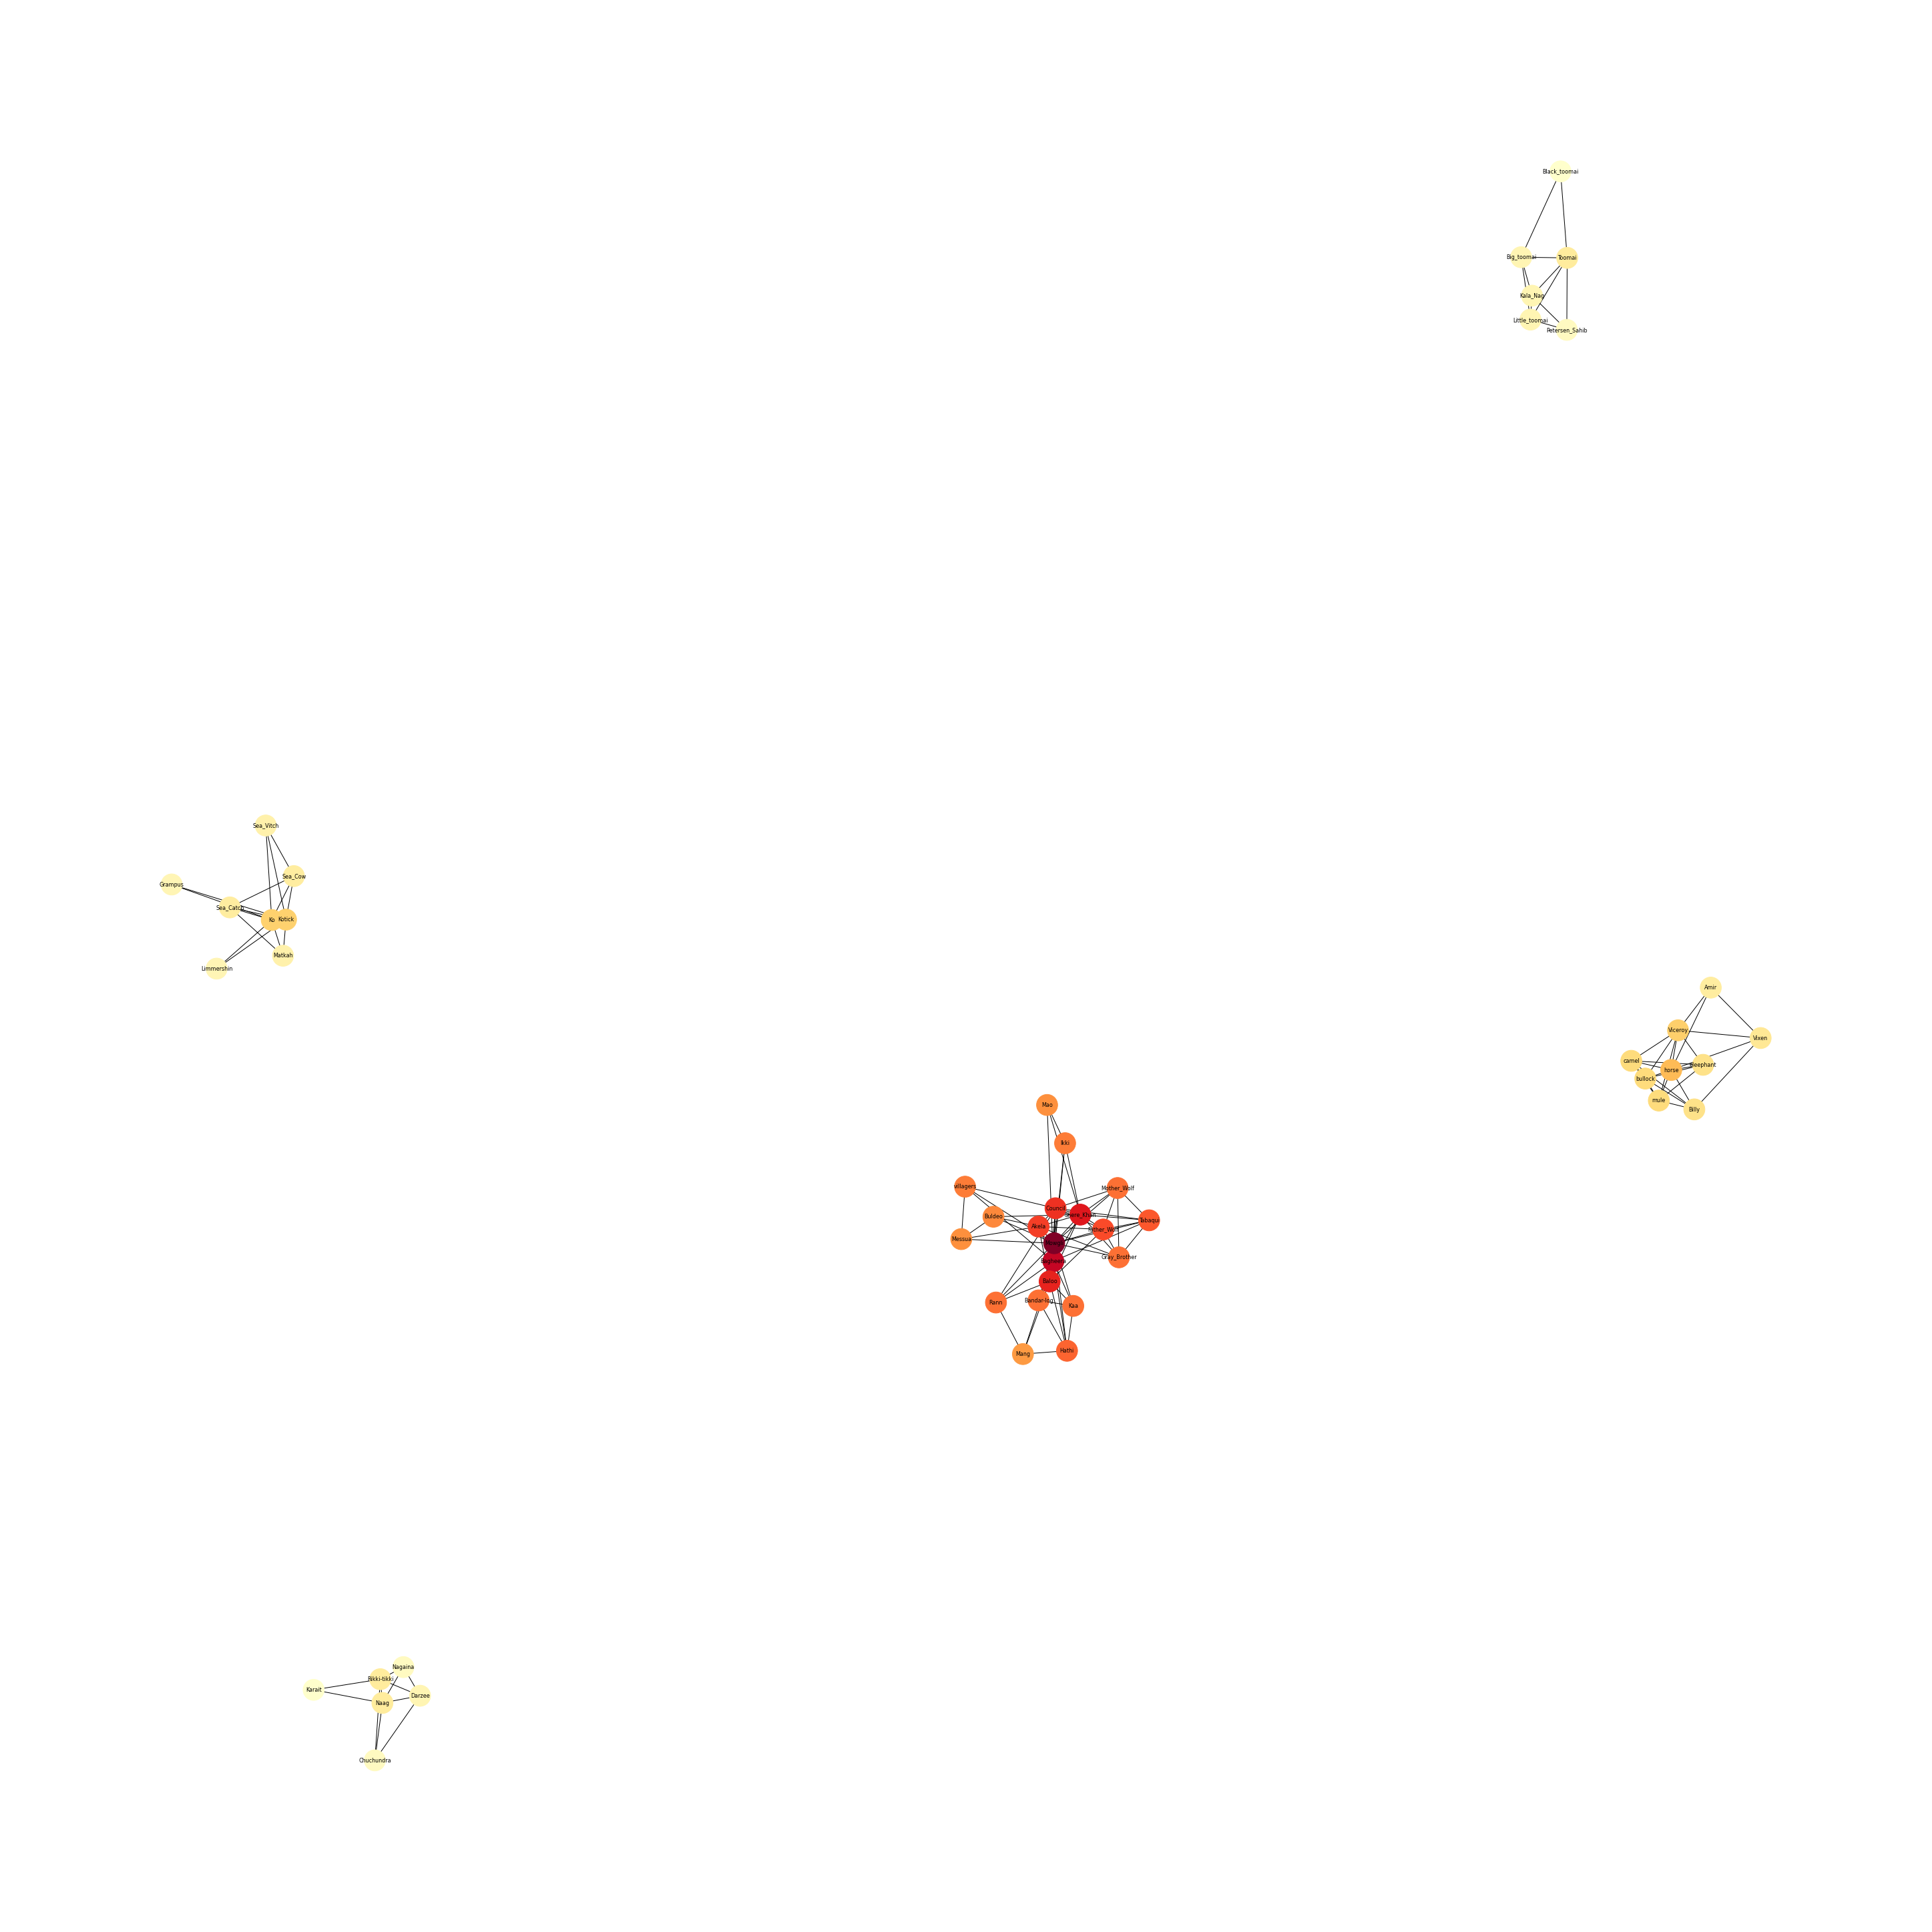

In [20]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(close_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

### Analysis 
It can be observed that Mowgli has the highest closeness centrality in the graph which is justifiable because he in the main protagonist.

When we compare Bagheera and Baloo, Bagheera interacts with almost all the animals in the jungle while Baloo's interactions are mostly limited to Mowgli and Bagheera.  
Hence, information is accessible to the entire cluster via Bagheera more than Baloo and hence the former has more closeness centrality.

## Betweeness Centrality

In [21]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
print(sorted(bet_centrality.items(),key=lambda x:(x[1],x[0]),reverse=True))


[('Mowgli', 0.04195948850204168), ('Bagheera', 0.025808905928586773), ('Shere_Khan', 0.013558265021030979), ('Baloo', 0.009832462159589819), ('Akela', 0.0053381458966565345), ('Council', 0.0051028906082097565), ('Kotick', 0.005023640661938535), ('Ko', 0.005023640661938535), ('horse', 0.003945035460992907), ('Viceroy', 0.003102836879432624), ('Toomai', 0.0020685579196217494), ('Rikki-tikki', 0.0016252955082742316), ('Naag', 0.0016252955082742316), ('Father_Wolf', 0.0012626262626262627), ('Hathi', 0.0012193554081851954), ('Rann', 0.0010044402996530655), ('Tabaqui', 0.0009080163335482484), ('Big_toomai', 0.0008865248226950354), ('Billy', 0.0008865248226950353), ('villagers', 0.0008443093549476527), ('Messua', 0.0006648936170212766), ('Vixen', 0.0006205673758865247), ('Ikki', 0.0004221546774738264), ('Buldeo', 0.0004221546774738264), ('mule', 0.00039893617021276594), ('camel', 0.00039893617021276594), ('bullock', 0.00039893617021276594), ('Gray_Brother', 0.0003250591016548463), ('Sea_Cow',

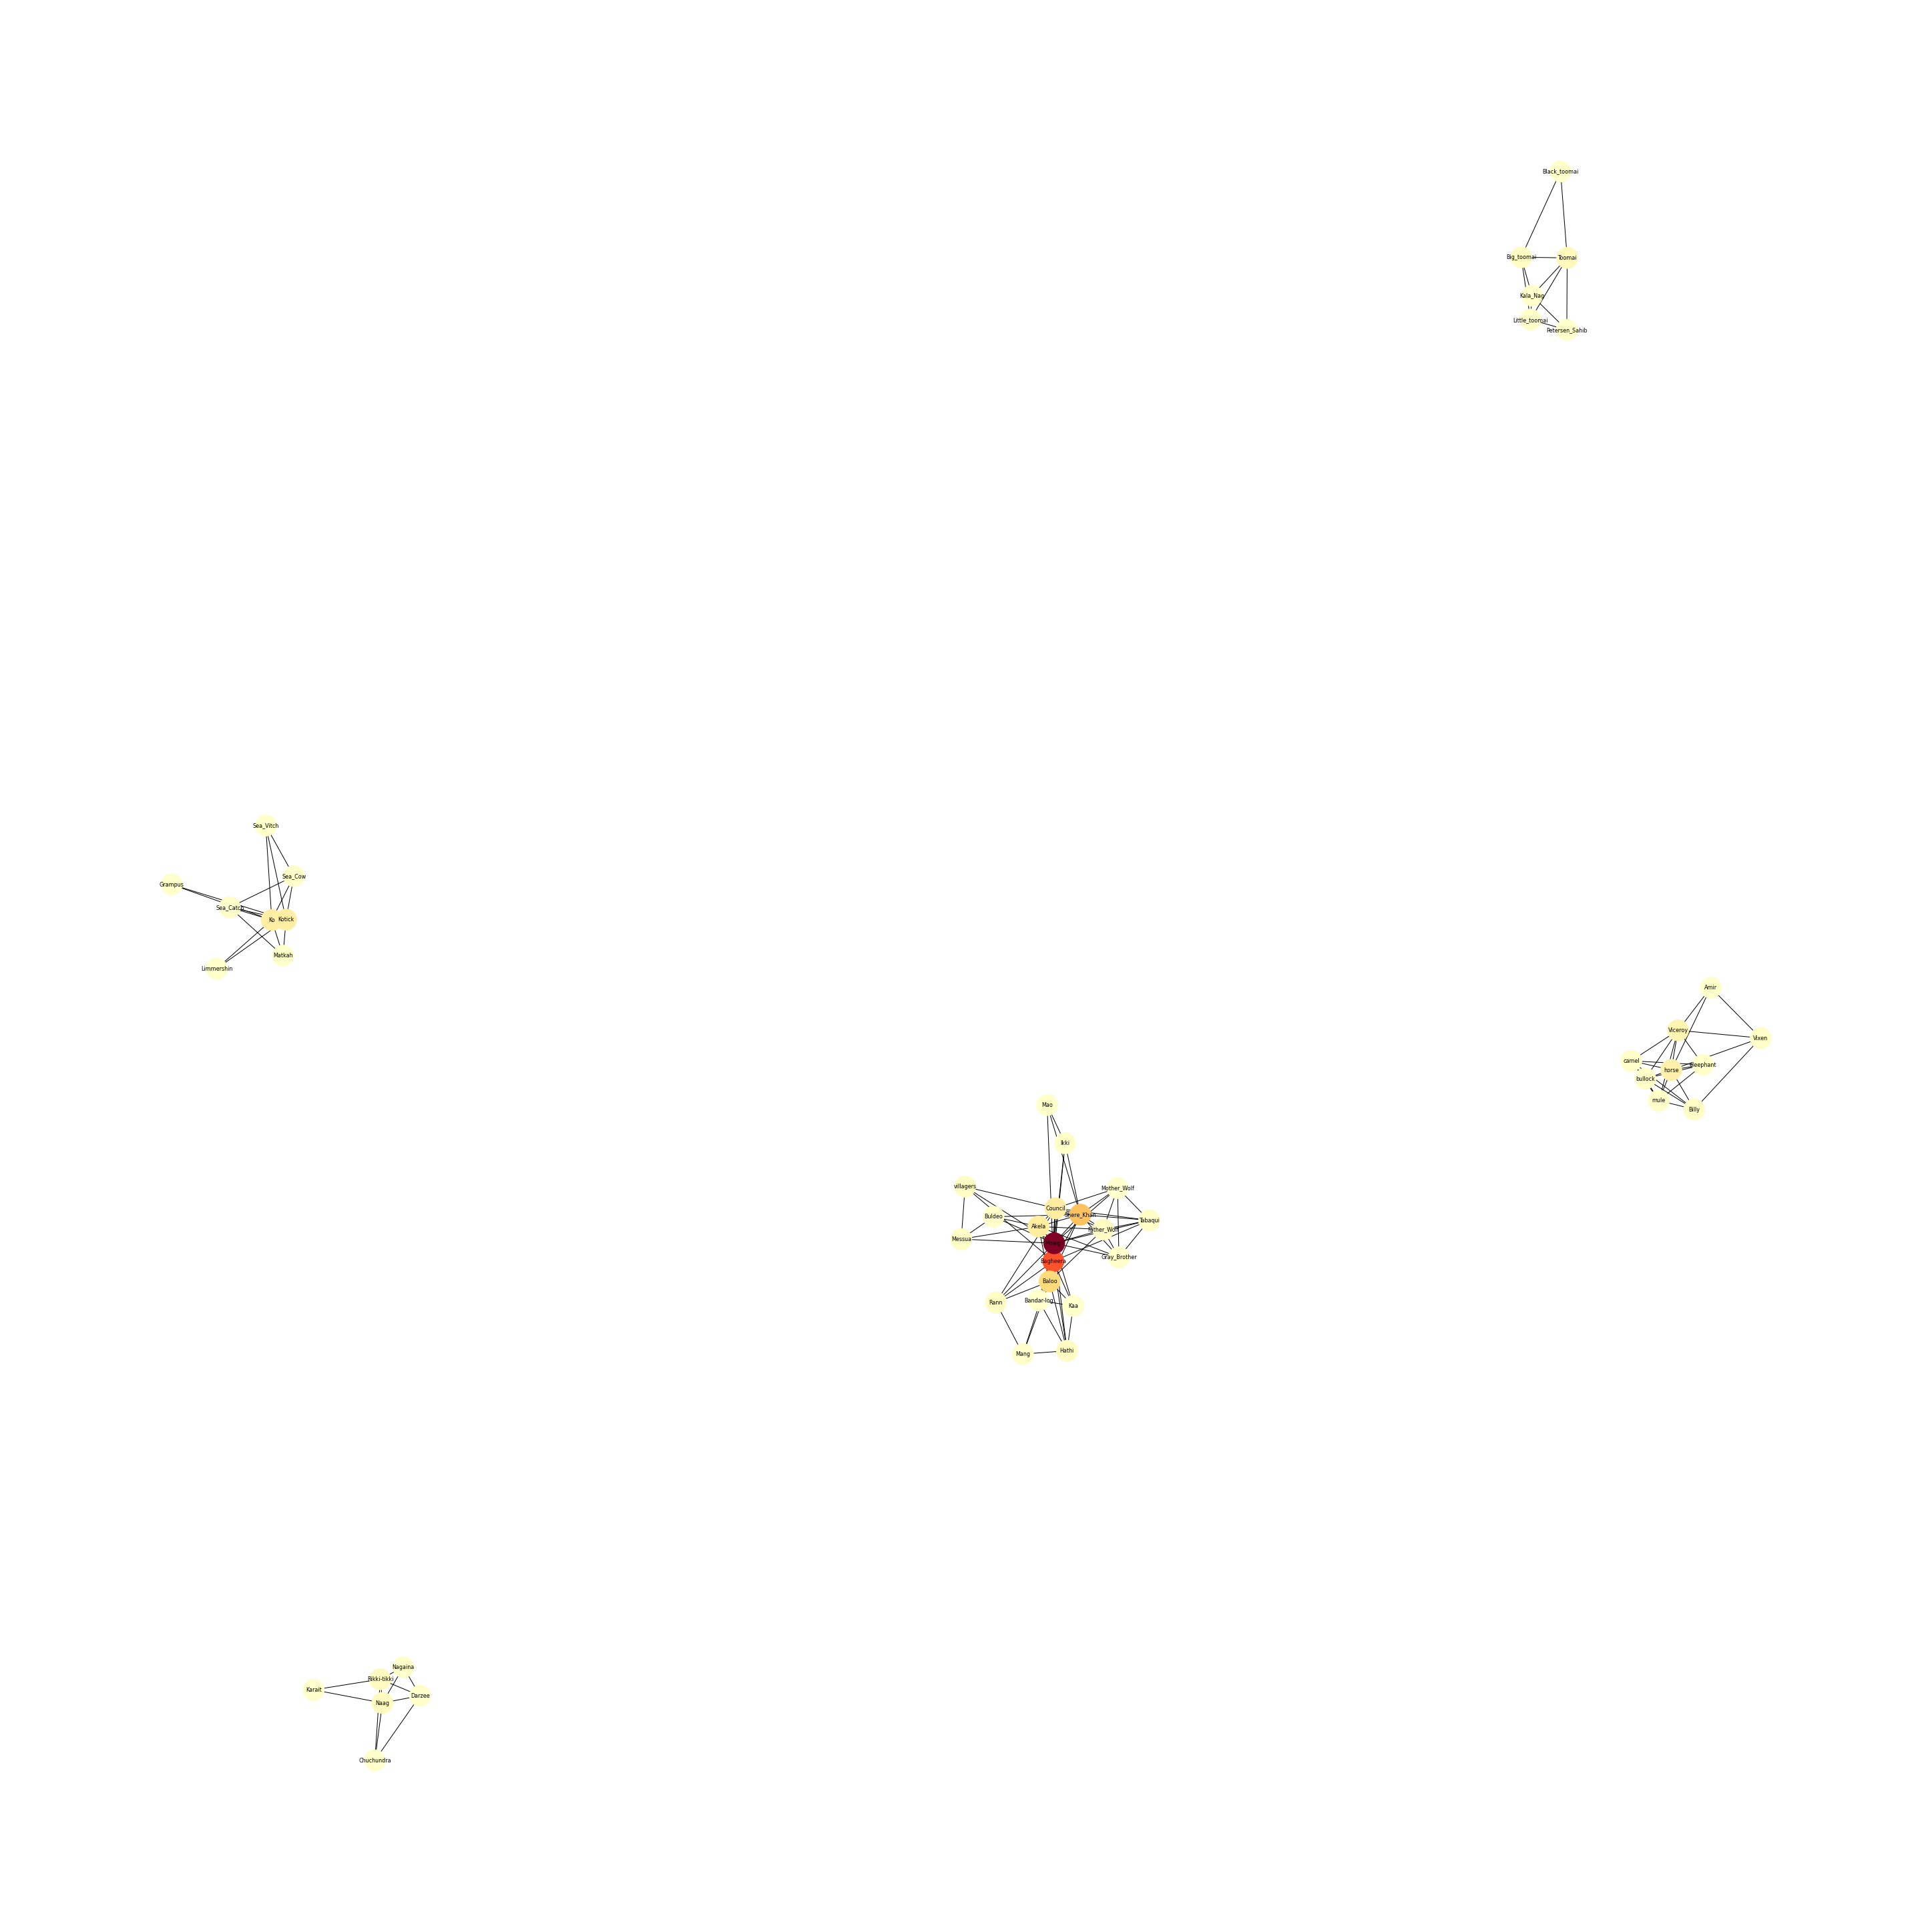

In [22]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw(G, cmap = plt.get_cmap('YlOrRd'), node_color = list(bet_centrality.values()), node_size=1000, pos=pos, with_labels=True, font_size=8)

### Analysis-
The shortest path of the information flow is via the main protagonist - Mowgli as he is the main mode that connects the wolf pack, the Council of Animals and the humans in the village to each other

Although, Kaa (the python) is portrayed as an important character, we can see from the given guttenberg reference synopsis analysis that Kaa does not really contribute to the flow of information throughout the rest of the graph ; Kaa is only consulted by Bagheera and interacts with Bander-log. The python otherwise, does not interacts with the rest of the graph.

In the story, Rikki-Tikki-Tavi, the betweeness centrality is highest for Rikki, the mongoose, who is the vital node that connects the humans, snakes and the tailor bird.

## Page Rank Centrality

In [23]:
pr = nx.pagerank(G, alpha = 0.8)
print(sorted(pr.items(),key=lambda x:(x[1],x[0]),reverse=True))

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

### Analysis-
Page rank centrality gives more insights and makes more sense for directed graphs. Since ours is an unidrected graph, this page rank centrality value is proportional to the edge weights of a particular node.

Hence it is seen that Mowgli has the highest page rank centrality as he interacts many times with many nodes.

# Section D - Global and Local Clustering Co-efficient and Communities

## Global Clustering Coefficient

In [24]:
cc=nx.average_clustering(G)
print(cc)

0.7846750688287302


## Local Clustering co-efficient of every node

In [25]:
print(sorted(nx.clustering(G).items(),key=lambda x:(x[1],x[0]),reverse=True))

[('eleephant', 1.0), ('Sea_Vitch', 1.0), ('Petersen_Sahib', 1.0), ('Nagaina', 1.0), ('Matkah', 1.0), ('Mao', 1.0), ('Limmershin', 1.0), ('Karait', 1.0), ('Kaa', 1.0), ('Grampus', 1.0), ('Chuchundra', 1.0), ('Black_toomai', 1.0), ('Bandar-log', 1.0), ('Amir', 1.0), ('Mother_Wolf', 0.9333333333333333), ('mule', 0.8666666666666667), ('camel', 0.8666666666666667), ('bullock', 0.8666666666666667), ('Gray_Brother', 0.8666666666666667), ('Sea_Cow', 0.8333333333333334), ('Sea_Catch', 0.8333333333333334), ('Mang', 0.8333333333333334), ('Little_toomai', 0.8333333333333334), ('Kala_Nag', 0.8333333333333334), ('Ikki', 0.8333333333333334), ('Darzee', 0.8333333333333334), ('Buldeo', 0.8333333333333334), ('Tabaqui', 0.8095238095238095), ('Rann', 0.8), ('Hathi', 0.8), ('Father_Wolf', 0.7857142857142857), ('Billy', 0.7), ('villagers', 0.6666666666666666), ('Vixen', 0.6666666666666666), ('Messua', 0.6666666666666666), ('Big_toomai', 0.6666666666666666), ('Viceroy', 0.6190476190476191), ('horse', 0.60714

### Analysis -
All the nodes connected to eleephant (in the story Her Majesty's Servants) - horse, mule, bullock, Viceroy and camel are all connected to each other and hence has local clustering of 1.0

### Local clustering co-efficients of protagonists

In [26]:
protagonists = ['Mowgli', 'Bagheera', 'Shere_Khan', 'Rikki-tikki', 'Naag', 'Kotick', 'Toomai']
local_clustering = nx.clustering(G)

for i in protagonists:
    print(i,local_clustering[i])

Mowgli 0.35294117647058826
Bagheera 0.37362637362637363
Shere_Khan 0.5
Rikki-tikki 0.6
Naag 0.6
Kotick 0.42857142857142855
Toomai 0.6


### Analysis - 
Mowgli, though the protagonist serves as a node that connects many charaacters in the the story together. This however means that there are nodes that neighbour Mowgli that are not interlinked with each other. 
For example - the humans in the village and the domestic animals (like Buldeo the buffalo) have no connections with the animals in the jungle.   
Similarly, there exist characters like Kaa which are outcasts in the jungle and are linked to the story only via protagonists like Bagheera and Baloo

## K-Component
As shown below, our graph consists of maximal subgraphs (cliques) of size k = 6,5,4,3,2,1

In [ ]:
k_components = nx.k_components(G)
for key,value in k_components.items():
    print("k=",key,": Nodes = ",value)
    print()
#print(k_components)

In [ ]:
#!pip install python-louvain

## Cliques in the network

In [ ]:
import community  # You need to install this separate this
#list(nx.find_cliques(G))  # Search for all maximal cliques in a graph.

for i in nx.find_cliques(G):
    print("k=",len(i),": Nodes = ",i)

In [ ]:
synthetic = nx.make_max_clique_graph(G)  

# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph. 
print(synthetic.edges())

## Finding overlapping communities 

In [ ]:
%matplotlib inline
plt.figure(3, figsize=(50,50))
nx.draw_networkx(synthetic,node_color='#E7FBBE',node_size = 800, font_size=8)

There is a community containing the nodes 7,8,9 which correspond to:  
k= 4 : Nodes =  ['Naag', 'Rikki-tikki', 'Darzee', 'Chuchundra']  
k= 4 : Nodes =  ['Naag', 'Rikki-tikki', 'Darzee', 'Nagaina']  
k= 3 : Nodes =  ['Naag', 'Rikki-tikki', 'Karait']  

These three cliques belong to the story Rikki-Tikki-Tavi




## Community detection using the Girvan Newmann Algorithm 

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

These are the five communities that remain and have interconnected nodes.  
This result is inline with the book that has 7 different stories of which the first three stories have the same characters.  
The remaining stories do not have any overlapping characters with each other.  
This explains the formation of the five communities.

# Section E - Degree Distribution, Largest Component, Average Shortest Path, Generative Models

### Retrieving the community with highest modularity, i.e.., the best structured community

In [ ]:
#first compute the best partition
part = community.best_partition(G)
print(part)
# sort based on values

### Modularity of the community
Community - Mowgli and friends

In [ ]:
print(community.modularity(part, G))

In [ ]:
induced = community.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

Here, the communities are represented by the five nodes.  
There are no edges between these nodes as there is no link between the communities. 

In [ ]:
%matplotlib inline
plt.figure(3, figsize=(6,6))
nx.draw_networkx(induced,node_color='#FFCBCB',node_size = 800, font_size=8 )

### Most important sub-graph - Mowgli and Friends 

In [ ]:
SG=G.subgraph(list(largest_cluster))

In [ ]:
%matplotlib inline
plt.figure(3, figsize=(10,10))
nx.draw_networkx(SG,node_color='#D18CE0',node_size = 800, font_size=8 )
print(len(largest_cluster))
largest_cluster

## Maximal Clique Graph

In [ ]:

synthetic = nx.make_max_clique_graph(G)  
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph. 
print(synthetic.edges())

#### The following graph shows the connections among the common members of the maximum subgraphs (cliques) of different disconnected components .

In [ ]:
%matplotlib inline
plt.figure(3, figsize=(40,40))
nx.draw_networkx(synthetic,node_color='#BFA2DB', node_size = 800, font_size=8)

In [ ]:
## Number of nodes in each connected component
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

### Sub Graph for Her Majesty's Servants

In [ ]:

%matplotlib inline
plt.figure(3, figsize=(8,8))
SG_1=G.subgraph(list({'Amir', 'Viceroy', 'bullock', 'eleephant', 'camel', 'mule', 'horse', 'Vixen', 'Billy'}))
nx.draw_networkx(SG_1,node_color='#C6D57E',node_size = 800, font_size=8)

## Plotting degree distribution

In [ ]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


In [ ]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

print(degreeCount)

plt.show()

 Observation : Mode of n-degree node here 4-degree node is 13 i.e highest . Hence we can find that 25% of the nodes are atleast connected to 4 other nodes i.e 13 characters associate with 4 others.

In [ ]:
degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree_distribution.png")


log-log plot of the degree distribution shows nearly a linear decay and a straight line behaviour and thus indicating power law i.e  presence of hubs of nodes with larger degrees and less in number . 

## Average Shortest Path

In [ ]:
graphs = [G.subgraph(c) for c in nx.connected_components(G)]

for g in range(len(graphs)):
    print("Component",g+1, ":" ,nx.average_shortest_path_length(graphs[g]))


## Generative Models
### Random Graph

In [ ]:
# Considering the largest component for generative model prediction 
nodes=G.number_of_nodes()
print("Number of nodes: ",nodes)
Social_graph=graphs[0]
degree_list = list(nx.degree(graphs[0]))
print(degree_list)
no_nodes=len(degree_list)
total_degree=0
print("Degree for five nodes:")
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
print("Average degree:")
print(avg_degree)

In [ ]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

In [ ]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


In [ ]:
neighbours=5
BA = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(BA, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()


### Watts Strogatz Graph

In [ ]:
WS = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(WS, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [ ]:
print('Social graph analysed from story')
print('average shortest path',nx.average_shortest_path_length(Social_graph))
print('clustering coeff',nx.average_clustering(Social_graph))
print()

print('Barabasi-albert preferntial attachement generative model')
print('average shortest path',nx.average_shortest_path_length(BA))
print('clustering coeff',nx.average_clustering(BA))
print()

print('Small world graph')
print('average shortest path',nx.average_shortest_path_length(WS))
print('clustering coeff',nx.average_clustering(WS))

#### The social graph and the generative model (Barabasi Albert and Watts Strogatz) were analyzed.  
#### We can observe that the parameters clustering coefficient of Watts Strogatz is smaller thereby infering that less links can be more effective in relaying information. 
#### Whereas Barabasi Albert that includes growth and preferential attachment produces a scale free graph with similar clustering coefficient to the social graph obtained from the story itself.

In [ ]:
#!pip install node2vec
from node2vec import Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
node2vec

In [ ]:
# it uses word2vec
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [ ]:
model.wv.get_vector('Akela')

In [ ]:
model.wv.most_similar('Akela')

In [ ]:
model.wv.most_similar('Rikki-tikki')

In [ ]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [ ]:
#This can be used for missing edge prediction 

edges_kv = edges_embs.as_keyed_vectors()
edges_kv.most_similar(str(('Akela', 'Rikki-tikki')))

Since Rikki-tikki and Akela are not a part of the same story (they belong to different disconnected components) they may not have a direct edge between them.  
To compute the probability of a missing edge amongst these nodes , we observe highest confidence for Akela and Tabaqui. Hence, these nodes can be connected to Darzee which also has highest confidence level for the character Rikki-Tikki.


# Section F - Analysis


### Protagonists
In component-1 (Mowgli and Freinds):
1. Mowgli
2. Bagheera
3. Shere Khan (antagonist)

In component-2 (Rikki-Tikki-Tavi):
1. Rikki-Tikki
2. Naag (antagonist)

In component-3 (The White Seal):
1. Kotick (The seal)

In component-4 (The Toomai of Elephants):  
1. Toomai
In component-5 (Her Majesty's Servants):   
No main protagonist


### Preprocessing
All the characters that have spaces in between them are tokenized.
A few characters have mutliple names in the book :
a) Raksha -> Mother Wolf
b) Rama -> Father Wolf
c) Man cub -> Mowgli
Sentence tokenization

## Section - A

There are 56 characters in the book
Number of nodes in the graph: 49

## Section - B
This graph accurately indicates that there are five different stories present in the book, each of whose characters are not interlinked with each other.
Cluster 1 - Mowgli and Friends
Cluster 2 - Rikki-Tikki-Tavi
Cluster 3 - The White Seal (Kotick)
Cluster 4 - Toomai of the Elephants
Cluster 5 - Her Majesty's Servants

## Section - C
### Degree Centrality-
It is seen that Mowgli has the highest degree centrality as it is observed in the story that he interacts with all the characters - both humans and animals and hence has connections with many nodes

Bagheera has the second highest degree centrality as he is seen in the story as a diplomat and mediator who interacts with majority of the animals in the story incluing Baloo, Council of Animals, Mother Wolf, Kaa, Shere Khan, etc.

### Closness Centrality-
It can be observed that Mowgli has the highest closeness centrality in the graph which is justifiable because he in the main protagonist.

When we compare Bagheera and Baloo, Bagheera interacts with almost all the animals in the jungle while Baloo's interactions are mostly limited to Mowgli and Bagheera.
Hence, information is accessible to the entire cluster via Bagheera more than Baloo and hence the former has more closeness centrality.

### Betweeness Centrality-
The shortest path of the information flow is via the main protagonist - Mowgli as he is the main mode that connects the wolf pack, the Council of Animals and the humans in the village to each other

Although, Kaa (the python) is portrayed as an important character, we can see from the given guttenberg reference synopsis analysis that Kaa does not really contribute to the flow of information throughout the rest of the graph ; Kaa is only consulted by Bagheera and interacts with Bander-log. The python otherwise, does not interacts with the rest of the graph.

In the story, Rikki-Tikki-Tavi, the betweeness centrality is highest for Rikki, the mongoose, who is the vital node that connects the humans, snakes and the tailor bird.

### Page Rank Centrality-
Page rank centrality gives more insights and makes more sense for directed graphs. Since ours is an unidrected graph, this page rank centrality value is proportional to the edge weights of a particular node.

Hence it is seen that Mowgli has the highest page rank centrality as he interacts many times with many nodes.

## Section - D

### Global Clustering co-efficient
All the nodes connected to eleephant (in the story Her Majesty's Servants) - horse, mule, bullock, Viceroy and camel are all connected to each other and hence has local clustering of 1.0

### Local Clustering co-efficient
Mowgli, though the protagonist serves as a node that connects many charaacters in the the story together. This however means that there are nodes that neighbour Mowgli that are not interlinked with each other. For example - the humans in the village and the domestic animals (like Buldeo the buffalo) have no connections with the animals in the jungle.
Similarly, there exist characters like Kaa which are outcasts in the jungle and are linked to the story only via protagonists like Bagheera and Baloo

### Communities
There is a community containing the nodes 7,8,9 which correspond to:
k= 4 : Nodes = ['Naag', 'Rikki-tikki', 'Darzee', 'Chuchundra']
k= 4 : Nodes = ['Naag', 'Rikki-tikki', 'Darzee', 'Nagaina']
k= 3 : Nodes = ['Naag', 'Rikki-tikki', 'Karait']

These three cliques belong to the story Rikki-Tikki-Tavi


Here, the communities are represented by the five nodes.
There are no edges between these nodes as there is no link between the communities.

## Section-E
### Degree Distribution
log-log plot of the degree distribution shows nearly a linear decay and a straight line behaviour and thus indicating power law i.e presence of hubs of nodes with larger degrees and less in number.

### Generative models

### Random generative model,  Barabasi Albert (preferential attachment) and Watts Strogatz (small world model)
The social graph and the generative model (Barabasi Albert and Watts Strogatz) were analyzed.  
We can observe that the parameters clustering coefficient of Watts Strogatz is smaller thereby infering that less links can be more effective in relaying information.   
Whereas Barabasi Albert that includes growth and preferential attachment produces a scale free graph with similar clustering coefficient to the social graph obtained from the story itself.

### Predict missing edges

Since Rikki-tikki and Akela are not a part of the same story (they belong to different disconnected components) they may not have a direct edge between them.
To compute the probability of a missing edge amongst these nodes , we observe highest confidence for Akela and Tabaqui. Hence, these nodes can be connected to Darzee which also has highest cconfifdence level for the character Rikki-Tikki.